<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/CNN_Brain_Tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
base_dir = '/content/drive/MyDrive/brain_tumour'

In [4]:
translate = {'no':0, 'yes':1}
reverse_translate = {0:'no', 1:'yes'}

In [5]:
import os

dataset = []

for i in os.listdir(base_dir):
  dataset.append(os.path.join(base_dir,i))

dataset


['/content/drive/MyDrive/brain_tumour/no',
 '/content/drive/MyDrive/brain_tumour/yes']

In [6]:
image_dataset = []

for i in range(0, len(dataset)):
  for j in os.listdir(dataset[i]):
    image_dataset.append(os.path.join(dataset[i],j))

image_dataset

['/content/drive/MyDrive/brain_tumour/no/8 no.jpg',
 '/content/drive/MyDrive/brain_tumour/no/22 no.jpg',
 '/content/drive/MyDrive/brain_tumour/no/24 no.jpg',
 '/content/drive/MyDrive/brain_tumour/no/49 no.jpg',
 '/content/drive/MyDrive/brain_tumour/no/43 no.jpg',
 '/content/drive/MyDrive/brain_tumour/no/no 923.jpg',
 '/content/drive/MyDrive/brain_tumour/no/no 94.jpg',
 '/content/drive/MyDrive/brain_tumour/no/No21.jpg',
 '/content/drive/MyDrive/brain_tumour/no/21 no.jpg',
 '/content/drive/MyDrive/brain_tumour/no/32 no.jpg',
 '/content/drive/MyDrive/brain_tumour/no/15 no.jpg',
 '/content/drive/MyDrive/brain_tumour/no/no 2.jpg',
 '/content/drive/MyDrive/brain_tumour/no/no 4.jpg',
 '/content/drive/MyDrive/brain_tumour/no/28 no.jpg',
 '/content/drive/MyDrive/brain_tumour/no/no 7.jpeg',
 '/content/drive/MyDrive/brain_tumour/no/N19.JPG',
 '/content/drive/MyDrive/brain_tumour/no/no 96.jpg',
 '/content/drive/MyDrive/brain_tumour/no/5 no.jpg',
 '/content/drive/MyDrive/brain_tumour/no/N15.jpg',
 

In [7]:
print(len(image_dataset))

253


In [8]:
# convert one image into an array

from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/brain_tumour/yes/Y250.jpg', target_size = (256, 256))
img = img_to_array(img)
img = img/255
print(img.shape)

(256, 256, 3)


In [9]:
img[0][0][0]

0.05490196

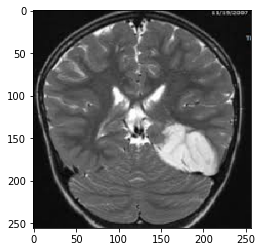

In [10]:
# convert array back to image

import matplotlib.pyplot as plt
plt.imshow(img)

In [11]:
image_array = []
image_label = []

for i in image_dataset:
    img = load_img(i, target_size = (256, 256))
    img = img_to_array(img)
    img = img/255
    image_array.append(img)
    label = i.split('/')[-2]
    image_label.append(translate[label])

In [12]:
set(image_label)

{0, 1}

In [13]:
c = len(set(image_label))
print('Number of classes in the dataset', c)

Number of classes in the dataset 2


In [14]:
import numpy as np
image_array = np.array(image_array)
image_label = np.array(image_label)

In [15]:
image_array.shape

(253, 256, 256, 3)

In [16]:
image_label.shape

(253,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, image_label, test_size = 0.2)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(202, 256, 256, 3)
(51, 256, 256, 3)
(202,)
(51,)


In [19]:
# Build the model

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Flatten, GlobalMaxPooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from keras.regularizers import l2, l1, l1_l2

In [20]:
image_array[0]. shape

i = Input(shape = image_array[0].shape)

# x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
# x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01))(i)
# x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1(0.01), bias_regularizer = l1(0.01))(i)

x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'valid')(i)
x = BatchNormalization()(x)

# x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01))(x)
# x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1(0.01), bias_regularizer = l1(0.01))(x)

x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'valid')(x)
x = BatchNormalization()(x)

# x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01))(x)
# x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1(0.01), bias_regularizer = l1(0.01))(x)

x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'valid')(x)
x = BatchNormalization()(x)

x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'valid')(x)
x = BatchNormalization()(x)

# x = Flatten()(x)
x = GlobalMaxPooling2D()(x)

x = Dropout(0.2)(x)
x = Dense(256, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(1, activation = 'sigmoid')(x)

m = Model(i, x)


In [21]:
y_train

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1])

In [22]:
# Compile and fit the model

# m.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

opt = tf.keras.optimizers.Adam(0.0001)
m.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
r = m.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
7/7 [==============================] - 14s 110ms/step - loss: 1.6627 - accuracy: 0.5347 - val_loss: 0.6897 - val_accuracy: 0.5098
Epoch 2/20
7/7 [==============================] - 0s 32ms/step - loss: 1.0082 - accuracy: 0.6733 - val_loss: 0.6874 - val_accuracy: 0.7059
Epoch 3/20
7/7 [==============================] - 0s 31ms/step - loss: 1.2510 - accuracy: 0.6436 - val_loss: 0.6867 - val_accuracy: 0.6471
Epoch 4/20
7/7 [==============================] - 0s 30ms/step - loss: 0.8245 - accuracy: 0.7129 - val_loss: 0.6865 - val_accuracy: 0.6471
Epoch 5/20
7/7 [==============================] - 0s 31ms/step - loss: 0.7049 - accuracy: 0.7426 - val_loss: 0.6876 - val_accuracy: 0.5490
Epoch 6/20
7/7 [==============================] - 0s 31ms/step - loss: 0.5434 - accuracy: 0.8069 - val_loss: 0.6883 - val_accuracy: 0.5098
Epoch 7/20
7/7 [==============================] - 0s 33ms/step - loss: 0.4769 - accuracy: 0.8069 - val_loss: 0.6885 - val_accuracy: 0.5098
Epoch 8/20
7/7 [=========

In [23]:
batch_size = 24
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1)
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    # rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # horizontal_flip=True,
    # rescale=1./255,
    # shear_range=0.2,
    zoom_range=0.2
    )
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = m.fit_generator(train_generator, validation_data = (X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
8/8 [==============================] - 3s 323ms/step - loss: 1.1153 - accuracy: 0.6180 - val_loss: 0.6694 - val_accuracy: 0.6471
Epoch 2/50
8/8 [==============================] - 2s 289ms/step - loss: 1.1241 - accuracy: 0.6910 - val_loss: 0.6647 - val_accuracy: 0.6863
Epoch 3/50
8/8 [==============================] - 2s 320ms/step - loss: 1.0361 - accuracy: 0.6236 - val_loss: 0.6557 - val_accuracy: 0.6471
Epoch 4/50
8/8 [==============================] - 2s 293ms/step - loss: 1.2663 - accuracy: 0.6348 - val_loss: 0.6461 - val_accuracy: 0.6667
Epoch 5/50
8/8 [==============================] - 2s 289ms/step - loss: 0.9810 - accuracy: 0.6742 - val_loss: 0.6341 - val_accuracy: 0.6863
Epoch 6/50
8/8 [==============================] - 2s 321ms/step - loss: 1.0566 - accuracy: 0.6685 - val_loss: 0.6243 - val_accuracy: 0.7059
Epoch 7/50
8/8 [==============================] - 2s 319ms/step - loss: 0.9310 - accuracy: 0.6854 - val_loss: 0.6203 - val_accuracy: 0.7255
Epoch 8/50
8/8 [====

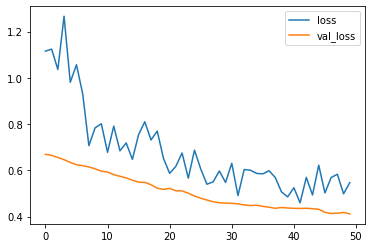

In [24]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

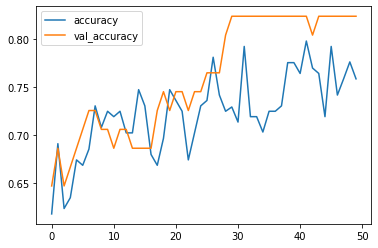

In [25]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [26]:
# predictions

y_test_pred = m.predict(X_test)
y_test_pred_decoded = y_test_pred > 0.5
y_test_pred_decoded

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [27]:
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, y_test_pred_decoded)
accuracy = metrics.accuracy_score(y_test, y_test_pred_decoded)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_test_pred_decoded)
recall = metrics.recall_score(y_test, y_test_pred_decoded)
f1 = metrics.f1_score(y_test, y_test_pred_decoded)

print('accuracy: ', accuracy)
print('error: ', error)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

print('\n')
print('The confusion matrix is: ')
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_decoded))

accuracy:  0.8235294117647058
error:  0.17647058823529416
precision:  0.7741935483870968
recall:  0.9230769230769231
f1:  0.8421052631578947


The confusion matrix is: 
[[18  7]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.77      0.92      0.84        26

    accuracy                           0.82        51
   macro avg       0.84      0.82      0.82        51
weighted avg       0.84      0.82      0.82        51



In [28]:
# Lets use the model to predict

import numpy as np

img = load_img('/content/drive/MyDrive/brain_tumour/no/No22.jpg', target_size = (256, 256))
img = img_to_array(img)
img = img/255
img = np.expand_dims(img, axis = 0)
img.shape

prediction = m.predict(img)
prediction = prediction > 0.5

if prediction:
  print('This person has brain tumor')
else:
  print('This person does not have brain tumour')

This person does not have brain tumour
